# Import Libraries

In [33]:
!pip install MultiColumnLabelEncoder

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
from scipy import stats
from prettytable import PrettyTable
import pickle
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

# Scikit-learn packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Neural Network packages
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv("D:/Freelancing/Mortality Detection/Dataset/Mortality-5.csv")
df.head(20)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,4303,nan,NaN,2017,101,1000,1,1,8,281784,...,43174.00,29856.00,29184.00,nan,nan,68.00,1608.00,nan,nan,nan
1,4303,nan,NaN,2017,101,1000,2,1,8,292339,...,56037.00,52655.00,88271.00,nan,nan,19.00,1178.00,nan,nan,nan
2,4303,nan,NaN,2017,101,1001,1,1,8,6198,...,62.00,36.00,15.00,nan,nan,1.00,41.00,nan,nan,nan
3,4303,nan,NaN,2017,101,1001,2,1,8,2516,...,86.00,45.00,29.00,nan,nan,0.00,29.00,nan,nan,nan
4,4303,nan,NaN,2017,101,1002,1,1,8,0,...,0.00,0.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
5,4303,nan,NaN,2017,101,1002,2,1,8,0,...,0.00,0.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
6,4303,nan,NaN,2017,101,1003,1,1,8,1,...,0.00,0.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
7,4303,nan,NaN,2017,101,1003,2,1,8,1,...,0.00,1.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
8,4303,nan,NaN,2017,101,1004,1,1,8,18,...,1.00,0.00,0.00,nan,nan,0.00,6.00,nan,nan,nan
9,4303,nan,NaN,2017,101,1004,2,1,8,4,...,0.00,0.00,1.00,nan,nan,0.00,1.00,nan,nan,nan


In [3]:
#check for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610184 entries, 0 to 610183
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Country     610184 non-null  int64  
 1   Admin1      0 non-null       float64
 2   SubDiv      3931 non-null    object 
 3   Year        610184 non-null  int64  
 4   List        610184 non-null  int64  
 5   Cause       610184 non-null  object 
 6   Sex         610184 non-null  int64  
 7   Frmat       610184 non-null  int64  
 8   IM_Frmat    610184 non-null  int64  
 9   Deaths1     610184 non-null  int64  
 10  Deaths2     608592 non-null  float64
 11  Deaths3     608592 non-null  float64
 12  Deaths4     594046 non-null  float64
 13  Deaths5     594046 non-null  float64
 14  Deaths6     594046 non-null  float64
 15  Deaths7     608592 non-null  float64
 16  Deaths8     608194 non-null  float64
 17  Deaths9     608592 non-null  float64
 18  Deaths10    608194 non-null  float64
 19  De

In [4]:
# check data type of each columns for further processing
df.dtypes

Country         int64
Admin1        float64
SubDiv         object
Year            int64
List            int64
Cause          object
Sex             int64
Frmat           int64
IM_Frmat        int64
Deaths1         int64
Deaths2       float64
Deaths3       float64
Deaths4       float64
Deaths5       float64
Deaths6       float64
Deaths7       float64
Deaths8       float64
Deaths9       float64
Deaths10      float64
Deaths11      float64
Deaths12      float64
Deaths13      float64
Deaths14      float64
Deaths15      float64
Deaths16      float64
Deaths17      float64
Deaths18      float64
Deaths19      float64
Deaths20      float64
Deaths21      float64
Deaths22      float64
Deaths23      float64
Deaths24      float64
Deaths25      float64
Deaths26      float64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtype: object

In [5]:
# check unique values for each feature vector and output 
df.nunique()

Country          99
Admin1            0
SubDiv            2
Year              4
List              3
Cause         10073
Sex               3
Frmat             6
IM_Frmat          4
Deaths1        5894
Deaths2         766
Deaths3         247
Deaths4         179
Deaths5         151
Deaths6         140
Deaths7         266
Deaths8         280
Deaths9         460
Deaths10        557
Deaths11        627
Deaths12        702
Deaths13        800
Deaths14        911
Deaths15       1070
Deaths16       1266
Deaths17       1500
Deaths18       1714
Deaths19       1875
Deaths20       1918
Deaths21       2156
Deaths22       2365
Deaths23       2531
Deaths24       1805
Deaths25       1243
Deaths26        216
IM_Deaths1      472
IM_Deaths2      341
IM_Deaths3      307
IM_Deaths4      418
dtype: int64

In [6]:
df = df.drop(columns= ['Admin1','Cause'], axis = 1)
df.head(20)

,Country,SubDiv,Year,List,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,4303,NaN,2017,101,1,1,8,281784,1608.00,133.00,...,43174.00,29856.00,29184.00,nan,nan,68.00,1608.00,nan,nan,nan
1,4303,NaN,2017,101,2,1,8,292339,1178.00,99.00,...,56037.00,52655.00,88271.00,nan,nan,19.00,1178.00,nan,nan,nan
2,4303,NaN,2017,101,1,1,8,6198,41.00,11.00,...,62.00,36.00,15.00,nan,nan,1.00,41.00,nan,nan,nan
3,4303,NaN,2017,101,2,1,8,2516,29.00,7.00,...,86.00,45.00,29.00,nan,nan,0.00,29.00,nan,nan,nan
4,4303,NaN,2017,101,1,1,8,0,0.00,0.00,...,0.00,0.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
5,4303,NaN,2017,101,2,1,8,0,0.00,0.00,...,0.00,0.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
6,4303,NaN,2017,101,1,1,8,1,0.00,0.00,...,0.00,0.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
7,4303,NaN,2017,101,2,1,8,1,0.00,0.00,...,0.00,1.00,0.00,nan,nan,0.00,0.00,nan,nan,nan
8,4303,NaN,2017,101,1,1,8,18,6.00,0.00,...,1.00,0.00,0.00,nan,nan,0.00,6.00,nan,nan,nan
9,4303,NaN,2017,101,2,1,8,4,1.00,0.00,...,0.00,0.00,1.00,nan,nan,0.00,1.00,nan,nan,nan


In [7]:
# general overview of dataset characteristics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Country,610184.00,3372.06,969.38,1125.00,2310.00,4010.00,4210.00,5198.00
Year,610184.00,2018.15,0.99,2017.00,2017.00,2018.00,2019.00,2020.00
List,610184.00,103.92,0.32,101.00,104.00,104.00,104.00,104.00
Sex,610184.00,1.50,0.67,1.00,1.00,1.00,2.00,9.00
Frmat,610184.00,0.16,0.63,0.00,0.00,0.00,0.00,9.00
IM_Frmat,610184.00,2.02,2.46,1.00,1.00,1.00,1.00,9.00
Deaths1,610184.00,201.33,7401.58,0.00,1.00,3.00,13.00,1473823.00
Deaths2,608592.00,2.50,110.72,0.00,0.00,0.00,0.00,20964.00
Deaths3,608592.00,0.26,11.90,0.00,0.00,0.00,0.00,2663.00
Deaths4,594046.00,0.15,6.99,0.00,0.00,0.00,0.00,1519.00


# Data Visualization and Preprocessing

## Look for Missing and NAN Values

In [8]:
# check for null or missing values
df.isnull().sum()

Country            0
SubDiv        606253
Year               0
List               0
Sex                0
Frmat              0
IM_Frmat           0
Deaths1            0
Deaths2         1592
Deaths3         1592
Deaths4        16138
Deaths5        16138
Deaths6        16138
Deaths7         1592
Deaths8         1990
Deaths9         1592
Deaths10        1990
Deaths11        1592
Deaths12        1990
Deaths13        1592
Deaths14        1990
Deaths15        1592
Deaths16        1990
Deaths17        1592
Deaths18        1990
Deaths19        1592
Deaths20        1990
Deaths21        1592
Deaths22        2337
Deaths23        2337
Deaths24       69710
Deaths25       69710
Deaths26        1592
IM_Deaths1      1592
IM_Deaths2     93652
IM_Deaths3     87853
IM_Deaths4     87853
dtype: int64

There are several columns that have missing values. We will replace these values with zero

In [9]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [10]:
# inplace
df.replace(np.nan, 0, inplace=True)
df.head(30)

,Country,SubDiv,Year,List,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,4303,0,2017,101,1,1,8,281784,1608.00,133.00,...,43174.00,29856.00,29184.00,0.00,0.00,68.00,1608.00,0.00,0.00,0.00
1,4303,0,2017,101,2,1,8,292339,1178.00,99.00,...,56037.00,52655.00,88271.00,0.00,0.00,19.00,1178.00,0.00,0.00,0.00
2,4303,0,2017,101,1,1,8,6198,41.00,11.00,...,62.00,36.00,15.00,0.00,0.00,1.00,41.00,0.00,0.00,0.00
3,4303,0,2017,101,2,1,8,2516,29.00,7.00,...,86.00,45.00,29.00,0.00,0.00,0.00,29.00,0.00,0.00,0.00
4,4303,0,2017,101,1,1,8,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,4303,0,2017,101,2,1,8,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,4303,0,2017,101,1,1,8,1,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,4303,0,2017,101,2,1,8,1,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,4303,0,2017,101,1,1,8,18,6.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00
9,4303,0,2017,101,2,1,8,4,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [11]:
# check for null or missing values
df.isnull().sum()

Country       0
SubDiv        0
Year          0
List          0
Sex           0
Frmat         0
IM_Frmat      0
Deaths1       0
Deaths2       0
Deaths3       0
Deaths4       0
Deaths5       0
Deaths6       0
Deaths7       0
Deaths8       0
Deaths9       0
Deaths10      0
Deaths11      0
Deaths12      0
Deaths13      0
Deaths14      0
Deaths15      0
Deaths16      0
Deaths17      0
Deaths18      0
Deaths19      0
Deaths20      0
Deaths21      0
Deaths22      0
Deaths23      0
Deaths24      0
Deaths25      0
Deaths26      0
IM_Deaths1    0
IM_Deaths2    0
IM_Deaths3    0
IM_Deaths4    0
dtype: int64

<AxesSubplot:>

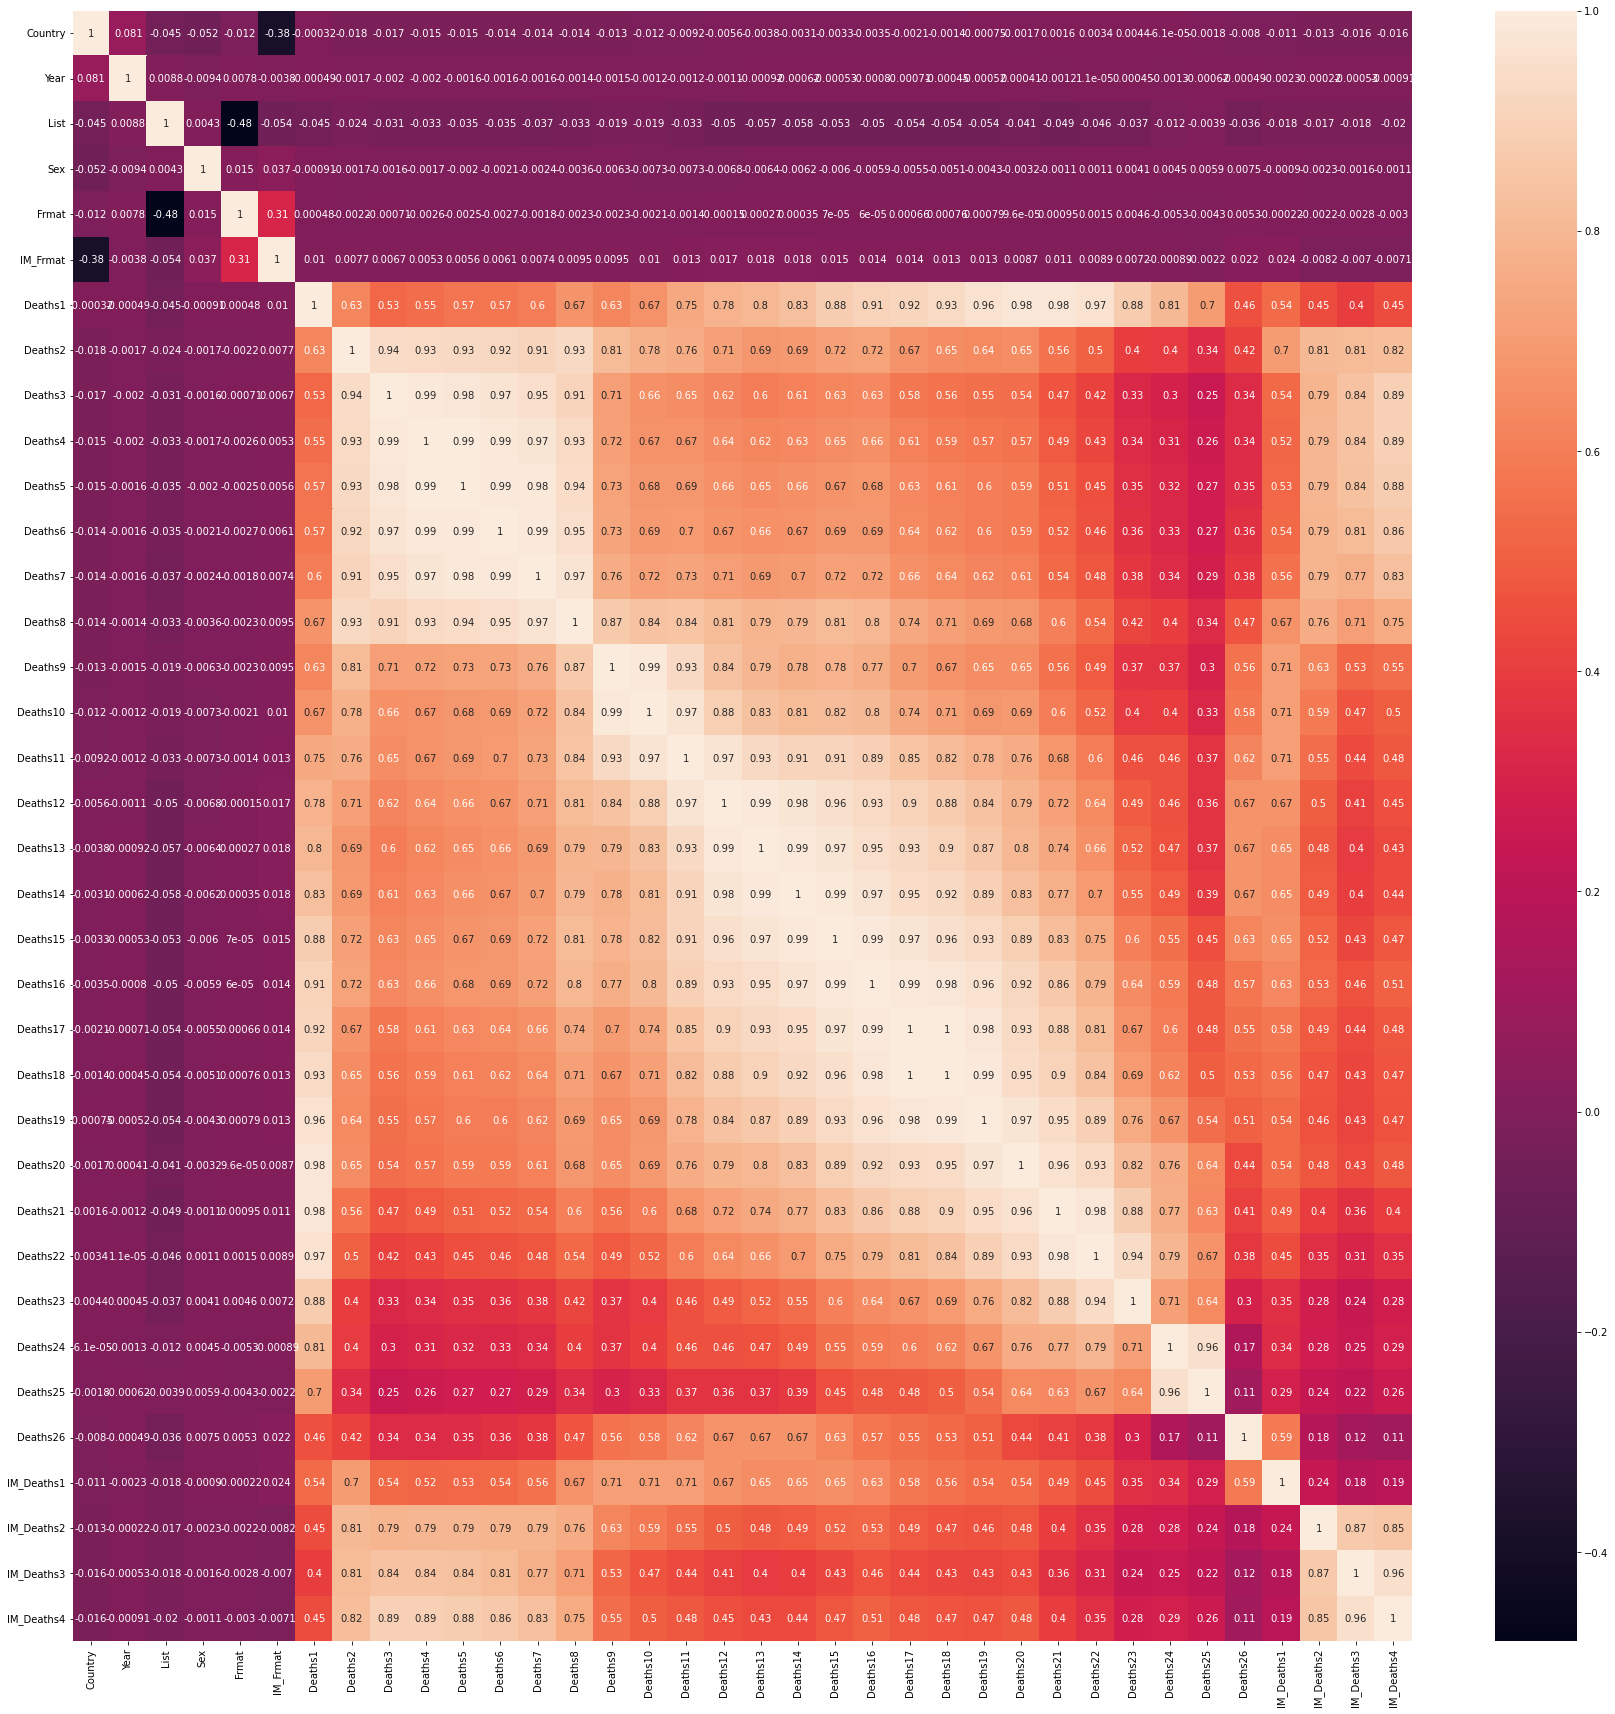

In [12]:
#heatmap
plt.figure(figsize=(30,30))
cor_map = df.corr()
sns.heatmap(cor_map, annot=True)

In [13]:
# check data type of each columns for further processing
df.dtypes

Country         int64
SubDiv         object
Year            int64
List            int64
Sex             int64
Frmat           int64
IM_Frmat        int64
Deaths1         int64
Deaths2       float64
Deaths3       float64
Deaths4       float64
Deaths5       float64
Deaths6       float64
Deaths7       float64
Deaths8       float64
Deaths9       float64
Deaths10      float64
Deaths11      float64
Deaths12      float64
Deaths13      float64
Deaths14      float64
Deaths15      float64
Deaths16      float64
Deaths17      float64
Deaths18      float64
Deaths19      float64
Deaths20      float64
Deaths21      float64
Deaths22      float64
Deaths23      float64
Deaths24      float64
Deaths25      float64
Deaths26      float64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtype: object

Heatmap shows correlation of each attribute values amonst each other.

In [14]:
output_columns=['Deaths1','Deaths2','Deaths3','Deaths4','Deaths5','Deaths6','Deaths7','Deaths8','Deaths9','Deaths10',
       'Deaths11','Deaths12','Deaths13','Deaths14','Deaths15','Deaths16','Deaths17','Deaths18','Deaths19','Deaths20',
       'Deaths21','Deaths22','Deaths23','Deaths24','Deaths25','Deaths26']

In [15]:
numerical_features = [features for features in df.columns if len(df[features].unique())!=3]
categorical_features = [features for features in df.columns if features not in numerical_features]

In [16]:
numerical_features

['Country',
 'Year',
 'Frmat',
 'IM_Frmat',
 'Deaths1',
 'Deaths2',
 'Deaths3',
 'Deaths4',
 'Deaths5',
 'Deaths6',
 'Deaths7',
 'Deaths8',
 'Deaths9',
 'Deaths10',
 'Deaths11',
 'Deaths12',
 'Deaths13',
 'Deaths14',
 'Deaths15',
 'Deaths16',
 'Deaths17',
 'Deaths18',
 'Deaths19',
 'Deaths20',
 'Deaths21',
 'Deaths22',
 'Deaths23',
 'Deaths24',
 'Deaths25',
 'Deaths26',
 'IM_Deaths1',
 'IM_Deaths2',
 'IM_Deaths3',
 'IM_Deaths4']

In [17]:
categorical_features

['SubDiv', 'List', 'Sex']

# Split Dataset into Train and Test Set

In [18]:
# split dataset into train and test set
X = df.drop(columns=output_columns, axis = 1)
Y = df[output_columns]
X.head()

,Country,SubDiv,Year,List,Sex,Frmat,IM_Frmat,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,4303,0,2017,101,1,1,8,1608.00,0.00,0.00,0.00
1,4303,0,2017,101,2,1,8,1178.00,0.00,0.00,0.00
2,4303,0,2017,101,1,1,8,41.00,0.00,0.00,0.00
3,4303,0,2017,101,2,1,8,29.00,0.00,0.00,0.00
4,4303,0,2017,101,1,1,8,0.00,0.00,0.00,0.00


In [19]:
Y.head()

,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,...,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26
0,281784,1608.00,133.00,87.00,77.00,60.00,214.00,254.00,633.00,1492.00,...,25946.00,31156.00,35464.00,26199.00,43174.00,29856.00,29184.00,0.00,0.00,68.00
1,292339,1178.00,99.00,59.00,47.00,36.00,177.00,148.00,257.00,416.00,...,10732.00,15243.00,22918.00,23718.00,56037.00,52655.00,88271.00,0.00,0.00,19.00
2,6198,41.00,11.00,7.00,4.00,7.00,7.00,7.00,10.00,41.00,...,609.00,373.00,182.00,78.00,62.00,36.00,15.00,0.00,0.00,1.00
3,2516,29.00,7.00,4.00,5.00,3.00,6.00,5.00,13.00,27.00,...,177.00,116.00,81.00,51.00,86.00,45.00,29.00,0.00,0.00,0.00
4,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
# Dataset is split into 80:20 ratio in which 80% of the total is allocated for training set and 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [21]:
X_train.dtypes

Country         int64
SubDiv         object
Year            int64
List            int64
Sex             int64
Frmat           int64
IM_Frmat        int64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtype: object

le = MultiColumnLabelEncoder()
 encoded_dataframe = le.fit_transform(dataframe)

 [Note: columns argument can also be passed if we want encoding only for certain columns. By default it will be none and it will encode all the categorical columns]

In [22]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [23]:

#MultiColumnLabelEncoder(columns = ['SubDiv','Cause']).fit_transform(X_train)

In [24]:
# Normalize input feature vector using standard scalar
le = LabelEncoder()
X_train['SubDiv'] = le.fit_transform(X_train['SubDiv'].astype(str))
X_test['SubDiv'] = le.fit_transform(X_test['SubDiv'].astype(str))

In [25]:
# Normalize input feature vector using standard scalar
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [26]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# print shape
print("x train Shape",X_train.shape)
print("y train Shape",y_train.shape)
print("x test Shape",X_test.shape)
print("y test Shape",y_test.shape)

x train Shape (488147, 11)
y train Shape (488147, 26)
x test Shape (122037, 11)
y test Shape (122037, 26)


# Train Linear Regression Model

In [27]:
x_train = X_train
x_test = X_test

In [28]:
## Train Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
pred = linear_model.predict(x_train)

print("Performace of trained model on Training Data")
print("=============================================")

mse_linear =  mean_squared_error(y_train,pred)
print("MSE: ",np.round(mse_linear,2))

rmse_linear = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE: ",np.round(rmse_linear,2))

mae_linear = mean_absolute_error(y_train,pred)
print("MAE: ",np.round(mae_linear,2))

r2_linear = r2_score(y_train,pred)
print ("R2: ",np.round(r2_linear,2))

print ("Score (train): ",np.round(linear_model.score(x_train, y_train),2))

Performace of trained model on Training Data
MSE:  1349387.55
RMSE:  1161.63
MAE:  27.85
R2:  0.58
Score (train):  0.58


In [30]:
pred = linear_model.predict(x_test)
print("Performace of trained model on Testing Data")
print("===========================================")

mse_linear =  mean_squared_error(y_test,pred)
print("MSE: ",np.round(mse_linear,2))

rmse_linear = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ",np.round(rmse_linear,2))

mae_linear = mean_absolute_error(y_test,pred)
print("MAE: ",np.round(mae_linear,2))

r2_linear = r2_score(y_test,pred)
print ("R2: ",np.round(r2_linear,2))

print ("Score (test): ",np.round(linear_model.score(x_test, y_test),2))

Performace of trained model on Testing Data
MSE:  1336808.71
RMSE:  1156.2
MAE:  27.8
R2:  0.59
Score (test):  0.59


# Train GradientBoosting Regressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
## Train GradientBoosting Regression Model

gbr_model = GradientBoostingRegressor()
gbr_model=MultiOutputRegressor(gbr_model)
gbr_model.fit(x_train,y_train)
pred = gbr_model.predict(x_train)

print("Performace of trained model on Training Data")
print("=============================================")

mse_gbr =  mean_squared_error(y_train,pred)
print("MSE: ",np.round(mse_gbr,2))

rmse_gbr = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE: ",np.round(rmse_gbr,2))

mae_gbr = mean_absolute_error(y_train,pred)
print("MAE: ",np.round(mae_gbr,2))

r2_gbr = r2_score(y_train,pred)
print ("R2: ",np.round(r2_gbr,2))

print ("Score (train): ",np.round(gbr_model.score(x_train, y_train),2))

Performace of trained model on Training Data
MSE:  238888.23
RMSE:  488.76
MAE:  15.39
R2:  0.92
Score (train):  0.92


In [34]:
pred = gbr_model.predict(x_test)

print("Performace of trained model on Testing Data")
print("============================================")

mse_gbr =  mean_squared_error(y_test,pred)
print("MSE: ",np.round(mse_gbr,2))

rmse_gbr = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ",np.round(rmse_gbr,2))

mae_gbr = mean_absolute_error(y_test,pred)
print("MAE: ",np.round(mae_gbr,2))

r2_gbr = r2_score(y_test,pred)
print ("R2: ",np.round(r2_gbr,2))

print ("Score (test): ",np.round(gbr_model.score(x_test, y_test),2))

Performace of trained model on Testing Data
MSE:  366270.29
RMSE:  605.2
MAE:  16.96
R2:  0.79
Score (test):  0.79


In [35]:
# set path to save model here

pickle.dump(gbr_model,open('D:/Freelancing/Mortality Detection/Saved Model/gbr.pkl','wb'))

# Train Ridge Regression Model

In [36]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
pred = ridge_model.predict(x_train)

print("Performace of trained model on Training Data")
print("=============================================")

mse_ridge =  mean_squared_error(y_train,pred)
print("MSE: ",np.round(mse_ridge,2))

rmse_ridge = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE: ",np.round(rmse_ridge,2))

mae_ridge = mean_absolute_error(y_train,pred)
print("MAE: ",np.round(mae_ridge,2))

r2_ridge = r2_score(y_train,pred)
print ("R2: ",np.round(r2_ridge,2))

print ("Score (train): ",np.round(ridge_model.score(x_train, y_train),2))

Performace of trained model on Training Data
MSE:  1349387.55
RMSE:  1161.63
MAE:  27.85
R2:  0.58
Score (train):  0.58


In [37]:
pred = ridge_model.predict(x_test)

print("Performace of trained model on Testing Data")
print("============================================")

mse_gbr =  mean_squared_error(y_test,pred)
print("MSE: ",np.round(mse_gbr,2))

rmse_gbr = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ",np.round(rmse_gbr,2))

mae_gbr = mean_absolute_error(y_test,pred)
print("MAE: ",np.round(mae_gbr,2))

r2_gbr = r2_score(y_test,pred)
print ("R2: ",np.round(r2_gbr,2))

print ("Score (test): ",np.round(ridge_model.score(x_test, y_test),2))

Performace of trained model on Testing Data
MSE:  1336810.4
RMSE:  1156.21
MAE:  27.8
R2:  0.59
Score (test):  0.59


# Train Lasso Regression Model

In [38]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)
pred = lasso_model.predict(x_train)

print("Performace of trained model on Training Data")
print("=============================================")

mse_lasso =  mean_squared_error(y_train,pred)
print("MSE: ",np.round(mse_lasso,2))

rmse_lasso = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE: ",np.round(rmse_lasso,2))

mae_lasso = mean_absolute_error(y_train,pred)
print("MAE: ",np.round(mae_lasso,2))

r2_lasso = r2_score(y_train,pred)
print ("R2: ",np.round(r2_lasso,2))

print ("Score (train): ",np.round(lasso_model.score(x_train, y_train),2))

Performace of trained model on Training Data
MSE:  1349428.81
RMSE:  1161.65
MAE:  26.8
R2:  0.57
Score (train):  0.57


In [39]:
pred = lasso_model.predict(x_test)

print("Performace of trained model on Testing Data")
print("============================================")

mse_gbr =  mean_squared_error(y_test,pred)
print("MSE: ",np.round(mse_gbr,2))

rmse_gbr = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ",np.round(rmse_gbr,2))

mae_gbr = mean_absolute_error(y_test,pred)
print("MAE: ",np.round(mae_gbr,2))

r2_gbr = r2_score(y_test,pred)
print ("R2: ",np.round(r2_gbr,2))

print ("Score (test): ",np.round(lasso_model.score(x_test, y_test),2))

Performace of trained model on Testing Data
MSE:  1337422.39
RMSE:  1156.47
MAE:  26.78
R2:  0.58
Score (test):  0.58


# Train Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 300)
rf_model.fit(x_train,y_train)
pred = rf_model.predict(x_train)

print("Performace of trained model on Training Data")
print("=============================================")

mse_rf =  mean_squared_error(y_train,pred)
print("MSE: ",np.round(mse_rf,2))

rmse_rf = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE: ",np.round(rmse_rf,2))

mae_rf = mean_absolute_error(y_train,pred)
print("MAE: ",np.round(mae_rf,2))

r2_rf = r2_score(y_train,pred)
print ("R2: ",np.round(r2_rf,2))

print ("Score (train): ",np.round(rf_model.score(x_train, y_train),2))

Performace of trained model on Training Data
MSE:  103814.92
RMSE:  322.2
MAE:  11.58
R2:  0.95
Score (train):  0.95


In [43]:
pred = rf_model.predict(x_test)

print("Performace of trained model on Testing Data")
print("============================================")

mse_gbr =  mean_squared_error(y_test,pred)
print("MSE: ",np.round(mse_gbr,2))

rmse_gbr = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ",np.round(rmse_gbr,2))

mae_gbr = mean_absolute_error(y_test,pred)
print("MAE: ",np.round(mae_gbr,2))

r2_gbr = r2_score(y_test,pred)
print ("R2: ",np.round(r2_gbr,2))

print ("Score (test): ",np.round(rf_model.score(x_test, y_test),2))

Performace of trained model on Testing Data
MSE:  428002.18
RMSE:  654.22
MAE:  15.88
R2:  0.74
Score (test):  0.74


In [45]:
# set path to save model here

pickle.dump(rf_model,open('D:/Freelancing/Mortality Detection/Saved Model/rf.pkl','wb'))

# Train Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
pred = dt_model.predict(x_train)

print("Performace of trained model on Training Data")
print("=============================================")

mse_rf =  mean_squared_error(y_train,pred)
print("MSE: ",np.round(mse_rf,2))

rmse_rf = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE: ",np.round(rmse_rf,2))

mae_rf = mean_absolute_error(y_train,pred)
print("MAE: ",np.round(mae_rf,2))

r2_rf = r2_score(y_train,pred)
print ("R2: ",np.round(r2_rf,2))

print ("Score (train): ",np.round(dt_model.score(x_train, y_train),2))

Performace of trained model on Training Data
MSE:  65196.21
RMSE:  255.34
MAE:  9.94
R2:  0.98
Score (train):  0.98


In [47]:
pred = dt_model.predict(x_test)

print("Performace of trained model on Testing Data")
print("============================================")

mse_dt =  mean_squared_error(y_test,pred)
print("MSE: ",np.round(mse_dt,2))

rmse_dt = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ",np.round(rmse_dt,2))

mae_dt = mean_absolute_error(y_test,pred)
print("MAE: ",np.round(mae_dt,2))

r2_dt = r2_score(y_test,pred)
print ("R2: ",np.round(r2_dt,2))

print ("Score (test): ",np.round(dt_model.score(x_test, y_test),2))

Performace of trained model on Testing Data
MSE:  651022.45
RMSE:  806.86
MAE:  16.47
R2:  0.62
Score (test):  0.62


# Train Extra Tree Regressor 

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

et_model = ExtraTreesRegressor()
et_model.fit(x_train,y_train)
pred = et_model.predict(x_train)

print("Performace of trained model on Training Data")
print("=============================================")

mse_et =  mean_squared_error(y_train,pred)
print("MSE: ",np.round(mse_et,2))

rmse_et = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE: ",np.round(rmse_et,2))

mae_et = mean_absolute_error(y_train,pred)
print("MAE: ",np.round(mae_et,2))

r2_et = r2_score(y_train,pred)
print ("R2: ",np.round(r2_et,2))

print ("Score (train): ",np.round(et_model.score(x_train, y_train),2))

Performace of trained model on Training Data
MSE:  65196.21
RMSE:  255.34
MAE:  9.94
R2:  0.98
Score (train):  0.98


In [51]:
pred = et_model.predict(x_test)

print("Performace of trained model on Testing Data")
print("============================================")

mse_et =  mean_squared_error(y_test,pred)
print("MSE: ",np.round(mse_et,2))

rmse_et = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ",np.round(rmse_et,2))

mae_et = mean_absolute_error(y_test,pred)
print("MAE: ",np.round(mae_et,2))

r2_et = r2_score(y_test,pred)
print ("R2: ",np.round(r2_et,2))

print ("Score (test): ",np.round(et_model.score(x_test, y_test),2))

Performace of trained model on Testing Data
MSE:  526791.79
RMSE:  725.8
MAE:  15.75
R2:  0.83
Score (test):  0.83


In [52]:
# set path to save model here

pickle.dump(et_model,open('D:/Freelancing/Mortality Detection/Saved Model/et.pkl','wb'))

# Application Phase

In [57]:
# Take input from the user
country = int (input("Enter country: "))
subDiV = input ("Enter SubDiV: ")
cause = input ("Cause of death: ")
year = int (input("Enter Year (Year to which data refer): "))
List = int (input("Enter List of ICD revision used : "))
gender = int (input("Enter Gender (1 male, 2 female and 9 sex unspecified): "))
Frmat = int (input ("Enter Frmat (Age-group format for breakdown of deaths at 0-95+ yrs): "))
IM_Frmat = int (input ("Enter IM_Frmat (Age format for breakdown of infant deaths (0 year)): "))
IM_deaths1 = float(input ("Enter Number of Infant deaths at age 0 day: "))
IM_deaths2 = float(input ("Enter Number of Infant deaths at age 1-6 day: "))
IM_deaths3 = float(input ("Enter Number of Infant deaths at age 7-27 day: "))
IM_deaths4 = float(input ("Enter Number of Infant deaths at age 28-364 day: "))


Enter country: 4303
Enter SubDiV: 0
Cause of death: 1000
Enter Year (Year to which data refer): 2017
Enter List of ICD revision used : 101
Enter Gender (1 male, 2 female and 9 sex unspecified): 1
Enter Frmat (Age-group format for breakdown of deaths at 0-95+ yrs): 1
Enter IM_Frmat (Age format for breakdown of infant deaths (0 year)): 8
Enter Number of Infant deaths at age 0 day: 20
Enter Number of Infant deaths at age 1-6 day: 10
Enter Number of Infant deaths at age 7-27 day: 5
Enter Number of Infant deaths at age 28-364 day: 2


In [58]:
# convert into pandas dataframe

user_input = pd.DataFrame({ 'Country': [country],'SubDiV': [subDiV],'Year': [year],'List': [List],'Sex': [gender]
                          ,'Frmat': [Frmat],'IM_Frmat': [IM_Frmat],'IM_Deaths1': [IM_deaths1],'IM_Deaths2': [IM_deaths2],
                          'IM_Deaths3': [IM_deaths3],'IM_Deaths4': [IM_deaths4]})

print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

   Country SubDiV  Year  List  Sex  Frmat  IM_Frmat  IM_Deaths1  IM_Deaths2  \
0     4303      0  2017   101    1      1         8       20.00       10.00   

   IM_Deaths3  IM_Deaths4  
0        5.00        2.00  


In [59]:
user_input.dtypes

Country         int64
SubDiV         object
Year            int64
List            int64
Sex             int64
Frmat           int64
IM_Frmat        int64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtype: object

In [60]:
# load trained model 

model = pickle.load(open('D:/Freelancing/Mortality Detection/Saved Model/et.pkl','rb')) # specify path where model is saved

In [62]:
#le = LabelEncoder()
user_input['SubDiV'] = le.transform(user_input['SubDiV'].astype(str))


In [63]:
# convert into numpy arrays
user_input = np.array(user_input)

In [64]:
pred = model.predict(user_input)

print("Predicted Values: ")
print("====================\n")
print("Deaths 1 = ",pred[0][0])
print("Deaths 2 = ",pred[0][1])
print("Deaths 3 = ",pred[0][2])
print("Deaths 4 = ",pred[0][3])
print("Deaths 5 = ",pred[0][4])
print("Deaths 6 = ",pred[0][5])
print("Deaths 7 = ",pred[0][6])
print("Deaths 8 = ",pred[0][7])
print("Deaths 9 = ",pred[0][8])
print("Deaths 10 = ",pred[0][9])
print("Deaths 11 = ",pred[0][10])
print("Deaths 12 = ",pred[0][11])
print("Deaths 13 = ",pred[0][12])
print("Deaths 14 = ",pred[0][13])
print("Deaths 15 = ",pred[0][14])
print("Deaths 16 = ",pred[0][15])
print("Deaths 17 = ",pred[0][16])
print("Deaths 18 = ",pred[0][17])
print("Deaths 19 = ",pred[0][18])
print("Deaths 20 = ",pred[0][19])
print("Deaths 21 = ",pred[0][20])
print("Deaths 22 = ",pred[0][21])
print("Deaths 23 = ",pred[0][22])
print("Deaths 24 = ",pred[0][23])
print("Deaths 25 = ",pred[0][24])
print("Deaths 26 = ",pred[0][25])

Predicted Values: 

Deaths 1 =  151866.48
Deaths 2 =  1109.07
Deaths 3 =  83.67
Deaths 4 =  37.56
Deaths 5 =  29.45
Deaths 6 =  20.98
Deaths 7 =  95.98
Deaths 8 =  102.85
Deaths 9 =  231.08
Deaths 10 =  392.78
Deaths 11 =  582.49
Deaths 12 =  850.64
Deaths 13 =  1180.75
Deaths 14 =  1592.06
Deaths 15 =  2355.79
Deaths 16 =  3725.59
Deaths 17 =  5903.05
Deaths 18 =  8097.23
Deaths 19 =  10819.33
Deaths 20 =  13095.52
Deaths 21 =  19587.78
Deaths 22 =  24903.24
Deaths 23 =  41795.13
Deaths 24 =  9941.38
Deaths 25 =  5330.45
Deaths 26 =  2.63


In [67]:
# Use pretty table to show detail analysis
x = PrettyTable()
print("\nDetailed Performance of all Models")
print("==================================\n")
x.field_names=["Model","MSE", "MAE", "RMSE", "R2"]
x.add_row(["Linear Regression",np.round(mse_linear,2), np.round(mae_linear,2), np.round(rmse_linear,2), np.round(r2_linear,2)])
x.add_row(["Gadient Boosting Regression",366270.29, 605.2, 16.96, 0.79])
x.add_row(["Ridge Regression",np.round(mse_ridge,2), np.round(mae_ridge,2), np.round(rmse_ridge,2), np.round(r2_ridge,2)])
x.add_row(["Lasso Regression",np.round(mse_lasso,2), np.round(mae_lasso,2), np.round(rmse_lasso,2), np.round(r2_lasso,2)])
x.add_row(["Random Forest Regression",428002.18, 654.22, 15.88, 0.74])
x.add_row(["Decision Tree Regression",np.round(mse_dt,2), np.round(mae_dt,2), np.round(rmse_dt,2), np.round(r2_dt,2)])
x.add_row(["Extra Regression",np.round(mse_et,2), np.round(mae_et,2), np.round(rmse_et,2), np.round(r2_et,2)])

print(x)

print("\nBest Model")
print("============\n")
y = PrettyTable()
y.field_names=["Model","MSE", "MAE", "RMSE", "R2"]
y.add_row(["Extra Regression",np.round(mse_et,2), np.round(mae_et,2), np.round(rmse_et,2), np.round(r2_et,2)])
print(y)


Detailed Performance of all Models

+-----------------------------+------------+--------+---------+------+
|            Model            |    MSE     |  MAE   |   RMSE  |  R2  |
+-----------------------------+------------+--------+---------+------+
|      Linear Regression      | 1336808.71 |  27.8  |  1156.2 | 0.59 |
| Gadient Boosting Regression | 366270.29  | 605.2  |  16.96  | 0.79 |
|       Ridge Regression      | 1349387.55 | 27.85  | 1161.63 | 0.58 |
|       Lasso Regression      | 1349428.81 |  26.8  | 1161.65 | 0.57 |
|   Random Forest Regression  | 428002.18  | 654.22 |  15.88  | 0.74 |
|   Decision Tree Regression  | 651022.45  | 16.47  |  806.86 | 0.62 |
|       Extra Regression      | 526791.79  | 15.75  |  725.8  | 0.83 |
+-----------------------------+------------+--------+---------+------+

Best Model

+------------------+-----------+-------+-------+------+
|      Model       |    MSE    |  MAE  |  RMSE |  R2  |
+------------------+-----------+-------+-------+------+
|